# Assignment 1 - kNN - Curso de Ciência de Dados

_Feito por: [Dora](https://github.com/joaopedromattos)_

Seja muito bem-vindo ao seu primeiro dever de casa de Ciência de Dados.

Neste _notebook_ você aprenderá a dar seus primeiros passos dentro do _pipeline_ de um projeto de Ciência de Dados!

Conteúdos abordados nessa lição:
- Sintaxe Python;
- Numpy, Jupyter e Matplotlib;
- Coleta do *dataset*;
- Pré-processamento;
- Construção do modelo;
- *Fine-tunning*;


In [1]:
# Tomamos a liberdade de importar para você tudo aquilo que voce usara no seu trabalho! 
# Lembre-se de ter tudo instalado!
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

# Essas linhas sao apenas configuracoes de plotting. Elas nao sao importantes para o seu aprendizado,
# entao as trataremos como "magica" por agora, ok?
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Abaixo encontram-se os hiperparametros do modelo que sera construido.
# A nao ser que seja instruido, voce nao deve modifica-los
TRAIN_TEST_SPLIT_SIZE = 0.2 # Define que o TESTE correspondera a 20% do total do dataset
K = 1 # Define o numero de vizinhos a partir dos quais realizaremos a votacao do kNN

## Primeiros passos: Carregando o dataset

Ao executar a célula abaixo, você carregará o *mnist*, o *dataset* utilizado nessa lição.

O dataset possui 1797  imagens.


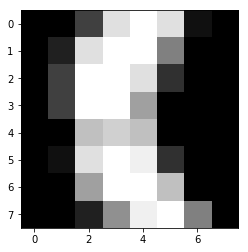

In [2]:
dataset = datasets.load_digits()

datasetSize = len(dataset.images)
print("O dataset possui", datasetSize, " imagens.")

# Mostraremos uma imagem aleatoria dentro do dataset
plt.imshow(dataset.images[np.random.randint(datasetSize)])

Como mencionado em aula, dentro do aprendizado supervisionado, precisamos realizar uma divisão dos dados entre dois conjuntos distintos, os quais serão chamados de **treino** e **teste**.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=TRAIN_TEST_SPLIT_SIZE)

print("Train shapes - X =", X_train.shape," y =", y_train.shape)
print("Test shapes - X =", X_test.shape," y =", y_test.shape)

Train shapes - X = (1437, 64)  y = (1437,)
Test shapes - X = (360, 64)  y = (360,)


In [4]:
from builtins import range
from builtins import object
import numpy as np


class KNearestNeighbor(object):
    """ Classficador kNN """

    def __init__(self):
        pass

    def _dist(self, x, x2):
        n = len(x)
        return (sum([(x2[i] - x[i])**2 for i in range(n)]))**(0.5)

    def train(self, X, y):
        """
        Como mostrado em aula, o modelo kNN simplesmente se lembra dos dados
        para, durante o teste, comparar com a instancia de inferencia, e isso
        eh exatamente o que este metodo faz.

        Inputs:
        - X: Array numpy de forma (num_train, D)
        - y: Array numpy de forma (N,), em que y[i] e o label de X[i]
        """
        self.X_train = X
        self.y_train = y
        print("Train format: ", self.X_train.shape)

    def predict(self, X, k=1):
        """
        Realiza a predicao conforme os k vizinhos mais proximos
        
        Inputs:
        - X: Array de teste, analogo ao de treino.
        - k: O numero de vizinhos utilizados para a classificacao
        - num_loops: Qual implementacao utilizar

        Returns:
        - y: Array numpy com todos labels y[i] de cada instancia X[i].
        """
        # Escreva seu codigo entre estas duas linhas
        dist = self.compute_distances_two_loops(X)
        return self.predict_labels(dists, k)
        # Escreva seu codigo entre estas duas linhas

    def compute_distances_two_loops(self, X):
        """
        Computa a distancia entre cada ponto de teste em X e cada ponto de
        treino em self.X_train usando loops aninhados para os dados de treino e
        teste.

        Inputs:
        - X: Array numpy (num_test, D) com os dados de teste

        Returns:
        - dists: Array numpy (num_test, num_train) onde a dists[i, j] e a 
        distancia Euclidiana entre o i-esimo ponto de teste e o j-esimo ponto
        de treino.
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))

        for i in tqdm(range(num_test), desc='calc dists'):
            for j in range(num_train):
                # TODO:
                # Realize a computação da distancia L2 (Euclidiana)
                # entre o i-esimo ponto do teste e o j-esimo ponto
                # do treino e armazene o resultado em dists[i, j]
                # Nao use mais que estes dois loops, nem np.linalg.norm().

                # Escreva seu codigo entre estas duas linhas
                dists[i][j] = self._dist(X[i], X_train[j])
        return dists
                # Escreva seu codigo entre estas duas linhas

    def predict_labels(self, dists, k=1):
        """
        Dada uma matriz de distancias entre pontos de teste e pontos de treino,
        prediz um label para cada ponto de teste.

        Inputs:
        - dists: Um array numpy de forma (num_test, num_train), onde dists[i, j]
        e a distancia entre o i-esimo elemento do teste e o j-esimo elemento
        do treino.

        Returns:
        - y: Numpy array com o formato (num_test,) com os labels das instancias
        de teste.
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        # Loop que itera por cada linha da matriz de distancias
        for i in range(num_test):

            # Lista na qual serao armazenados os k vizinhos mais proximos da
            # iteracao atual do loop.
            closest_y = []

            # TODO:
            # Use a matriz de distancias passada nos argumentos da funcao
            # para encontrar os 'k' vizinhos mais proximos da i-esima instancia
            # de teste.
            # DICA: Use a funcao numpy.argsort.

            # Escreva seu codigo entre estas duas linhas
            closest_dist = np.argsort(dists[i])
            closest_y = closest_dist[0:k]
            # Escreva seu codigo entre estas duas linhas

            # TODO:
            # Agora que voce possui os k vizinhos, realize uma votacao para
            # descobrir qual dos labels e o mais frequente. Em caso de empate,
            # escolha o menor dos labels.
            # DICA: Pesquise use as funcoes do numpy.

            # Escreva seu codigo entre estas duas linhas
            counts = np.bincount([self.y_train[y] for y  in closest_y])
            y_pred[i] = np.argmax(counts)
            
        return y_pred
            # Escreva seu codigo entre estas duas linhas



In [5]:
vec = np.array([1,2,3,1,2,1,1,1,3,2,2,1])

print('Vector:')
print(vec)

counts = np.bincount(vec)
print('Counts:')
print(counts)

print('Argmax:')
print(np.argmax(counts))

Vector:
[1 2 3 1 2 1 1 1 3 2 2 1]
Counts:
[0 6 4 2]
Argmax:
1


In [6]:
# Inicializando o classificador kNN e alimentando com os dados do treino...
kNN = KNearestNeighbor()
kNN.train(X_train, y_train)

Train format:  (1437, 64)


## Implementando o kNN
Agora que possuímos nossos dados, podemos implementar nosso modelo, o kNN(K-Nearest Neighbor).

Neste dever de casa, propomos 3 implementações diferentes do mesmo modelo, sendo a última um desafio!

Vamos por partes! Começemos pela versão mais simples (e ineficiente) do kNN. Acesse o arquivo ```kNN.py``` e vá até o método ```compute_distances_two_loops```. Nela, você deve calcular o kNN com dois loops aninhados, um que itera por todos os dados do conjunto de teste e outro que itera no conjunto de treino. Quando terminar, volte aqui e execute a célula abaixo. Boa sorte!


In [7]:
dists = kNN.compute_distances_two_loops(X_test)
print(dists.shape)

calc dists: 100%|██████████| 360/360 [01:10<00:00,  5.26it/s]

(360, 1437)


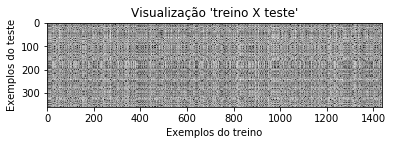

In [8]:
plt.imshow(dists, interpolation='none')
plt.ylabel("Exemplos do teste")
plt.xlabel("Exemplos do treino")
plt.title("Visualização 'treino X teste'")
plt.show()

Na imagem acima, quanto mais escura um ponto, menor é o valor da distância. A partir disso, tente refletir por algum tempo sobre o que significaria caso houvesse uma linha completamente branca ou uma coluna completamente branca no gráfico.

## Precisão da classificação

Agora que já computamos as distâncias, você precisa finalizar o processo de classficação através da inferência de cada um dos itens do teste. Vá até a função ```predict_labels``` no ```kNN.py``` e implemente o processo de classficação do kNN como visto em sala de aula. Confira o material disponibilizado ou entre em contato com os ministrantes caso ainda restem dúvidas! Boa sorte!

In [9]:
y_test_pred = kNN.predict_labels(dists, k=1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test)
print('Precisão %d / %d => %f' % (num_correct, len(y_test), accuracy))


Precisão 357 / 360 => 0.991667


In [10]:
def test(kNN, X, y_test, k):
    y_test_pred = kNN.predict(X, k)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / len(y_test)
    print('Precisão %d / %d => %f' % (num_correct, len(y_test), accuracy))

In [11]:
test(kNN, X_test, y_test, k=2)

calc dists: 100%|██████████| 360/360 [01:15<00:00,  4.61it/s]

Precisão 356 / 360 => 0.988889


In [12]:
test(kNN, X_test, y_test, k=3)

calc dists: 100%|██████████| 360/360 [01:15<00:00,  6.74it/s]


Precisão 356 / 360 => 0.988889


In [13]:
test(kNN, X_test, y_test, k=4)

calc dists: 100%|██████████| 360/360 [01:18<00:00,  4.26it/s]

Precisão 354 / 360 => 0.983333


In [14]:
test(kNN, X_test, y_test, k=5)

calc dists: 100%|██████████| 360/360 [01:17<00:00,  4.61it/s]

Precisão 353 / 360 => 0.980556


Antes de finalizar o *homework*, experimente diversos valores para o hiperparâmetro "k".

Excelente! Você chegou ao fim do homework! Esperamos que você tenha aprendido muito com este dever de casa!
Em caso de dúvidas, fique à vontade para falar com o ministrante da aula, João Pedro R. Mattos através do email (joao_pedro_mattos@hotmail.com) ou do Telegram (@joaopedromattos).